In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Badanie założenia o normalności rozkładu

Histfit: histogram z naniesionym fitem rozkładu normalnego

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


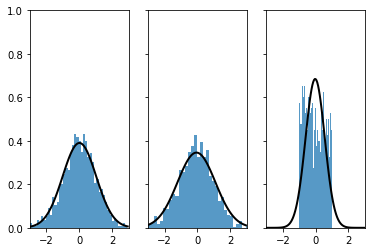

In [2]:
n=1000
ud=stats.uniform(-1,2)
nd=stats.norm()
td=stats.t(7)
data_u=ud.rvs(n)
data_n=nd.rvs(n)
data_t=td.rvs(n)

N_bins=50

t = np.arange(-3, 3, 0.05)
mu, sigma = stats.norm.fit(data_u)
mu_1, sigma_1 = stats.norm.fit(data_n)
mu_2, sigma_2 = stats.norm.fit(data_t)

fig, axs = plt.subplots(1,3, sharey=True)

axs[0].hist(data_n, N_bins, normed=True, alpha=0.75)
axs[0].set_xlim(-3,3)
axs[0].set_ylim(0,1)
axs[0].plot(t, stats.norm.pdf(t,mu_1, sigma_1), 'k-', lw=2, label='a=-1, b=1')
axs[1].hist(data_t, N_bins, normed=True, alpha=0.75)
axs[1].set_xlim(-3,3)
axs[1].set_ylim(0,1)
axs[1].plot(t, stats.norm.pdf(t,mu_2, sigma_2), 'k-', lw=2, label='a=-1, b=1')
axs[2].hist(data_u, N_bins, normed=True, alpha=0.75)
axs[2].set_xlim(-3,3)
axs[2].set_ylim(0,1)
axs[2].plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
plt.show()



# Normplot

Jest to wykres wartości w próbie, wzg. prawdopodobieństwa uzyskania takiej wartości w rozkładzie normalnym (zczegulny przypadek QQ-Plot). Wykres ten jest szczególnym przypadkiem kwantylowego wykresu prawdopodobieństwa. Konstruuje się go następująco:

<ul>
<li> Na osi pionowej odkładamy uporządkowane zaobserwowane wartości $x_1 \le x_2 \le \dots \le x_n$. Estymują one położenie kwantyli w populacji. </li> 
<li> Na osi poziomej odkładamy położenia kwantyli w rozkładzie normalnym. Obliczamy je: $F^{-1}\left(\frac{i-r_{pop}}{n+n_{pop}} \right)$ gdzie $F^{-1}$ jest funkcją odwrotną do dystrybuanty rozkładu teoretycznego (w tym szczególnym przypadku normalnego) i jest numerem obserwacji a $r_{pop}$, $n_{pop}$ są czynnikami ($\le 0.5 $) zapewniającymi, że argument funkcji odwrotnej do dystrybuanty nie przyjmuje wartości $0$ ani $1$. </li> 
</ul>

Jeśli dane $x$ podlegają rozkładowi normalnemu to ich położenia kwantyli powinny być zgodne z położeniami kwantyli w rozkładzie normalnym, zatem wykres powinien przedstawiać linię prostą. Odstępstwa od prostej świadczą o odstępstwie od rozkładu normalnego. 

In [3]:
def normplot(x):
    '''normplot: x dane do testowania'''
    x_ord = sorted(x)
    N = len(x)
    y = np.zeros(N)
    y[0]=stats.norm.ppf(1- 0.5**(1.0/N) )
    y[N-1] = stats.norm.ppf(0.5**(1.0/N) )
    for i in range(1,N-1):
        arg = float(i-0.3175)/(N+0.365)
        y[i] = stats.norm.ppf(arg)
    plt.plot(y,x_ord,'.')

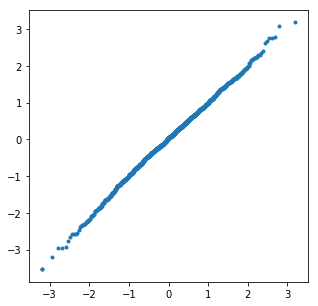

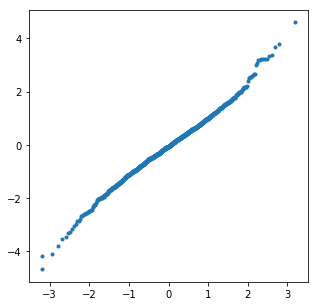

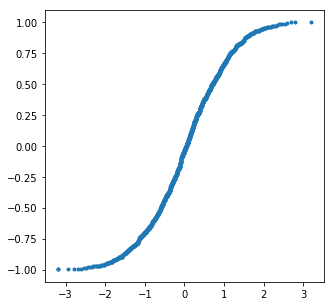

In [4]:
plt.figure(figsize=(5,5))
normplot(data_n)
plt.show()

plt.figure(figsize=(5,5))
normplot(data_t)
plt.show()

plt.figure(figsize=(5,5))
normplot(data_u)
plt.show()

# QQ-Plot
Q w QQ-Plot oznacza kwantyl. Na wykresie kwanty określonego zbioru danych są zaznaczana na podstawie kwantyli rozkładu referencyjnego, zazwyczaj standardowego rozkładu normalnego.

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


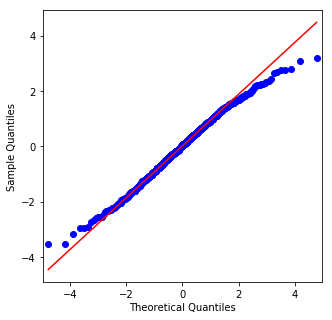

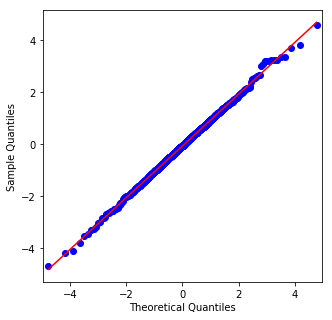

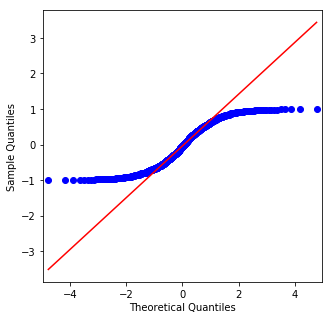

In [5]:
import statsmodels.api as sm
plt.rc("figure", figsize=(5,5))
sm.qqplot(data_n, stats.t, distargs=(7,), line='q')
sm.qqplot(data_t, stats.t, distargs=(7,), line='q')
sm.qqplot(data_u, stats.t, distargs=(7,), line='q')
plt.show()

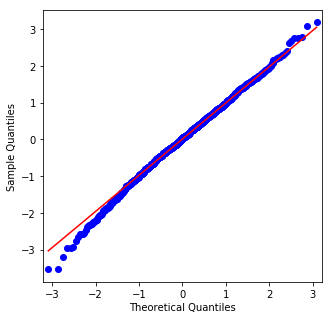

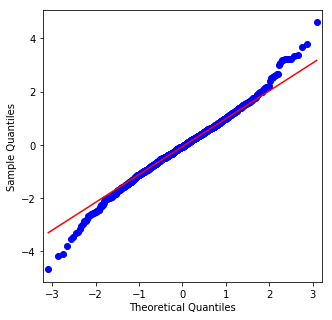

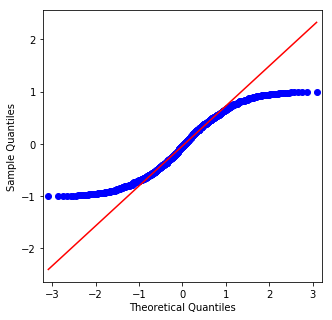

In [6]:
import statsmodels.api as sm
plt.rc("figure", figsize=(5,5))
sm.qqplot(data_n, stats.norm, line='q')
sm.qqplot(data_t, stats.norm, line='q')
sm.qqplot(data_u, stats.norm, line='q')
plt.show()

# PP-Plot
Na wykresie przedstawiona jest dystrybuanta CDF (dystrybuanta empiryczna dla zbioru danych) oraz dystrybuanta CDF rozkładu referencyjnego.

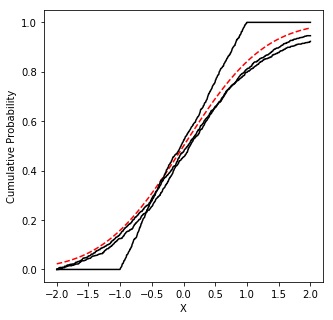

In [7]:
numPts = 1000
lowerLim = -2
upperLim = 2

nd_x = np.linspace(lowerLim, upperLim, numPts)
nd_y = nd.cdf(nd_x)
    
# Empirical CDF of the sample data, which range for approximately 0 to 10

ecdf_x = np.linspace(lowerLim, upperLim, numPts)
ecdf_y = stats.cumfreq(data_n, numPts, (lowerLim, upperLim))[0]/len(data_n)
ecdf_y1 = stats.cumfreq(data_t, numPts, (lowerLim, upperLim))[0]/len(data_t)
ecdf_y2 = stats.cumfreq(data_u, numPts, (lowerLim, upperLim))[0]/len(data_u)
        
plt.plot(nd_x, nd_y, 'r--')
plt.plot(ecdf_x, ecdf_y, color='k')
plt.plot(ecdf_x, ecdf_y1, color='k')
plt.plot(ecdf_x, ecdf_y2, color='k')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.show()

# Probability Plots
Na wykresie przedstawiona jest posortowana próbka w odniesieniu do kwantylów rozkładu referencyjnego.

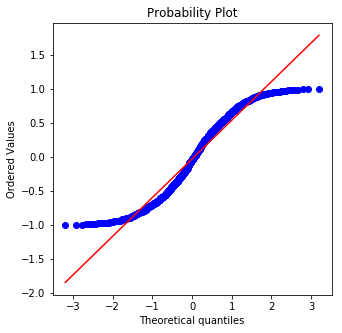

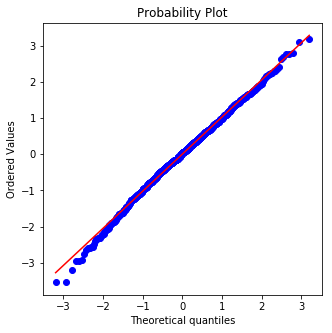

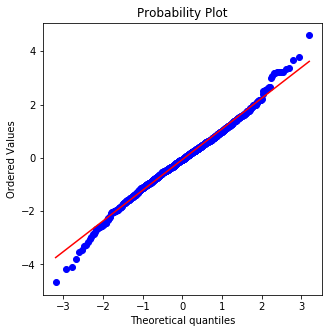

In [8]:
plt.rc("figure", figsize=(5,5))
stats.probplot(data_u, plot=plt)
plt.show()
stats.probplot(data_n, plot=plt)
plt.show()
stats.probplot(data_t, plot=plt)
plt.show()

In [13]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]
boston.data.shape

(506, 13)

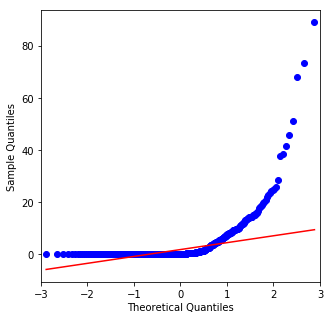

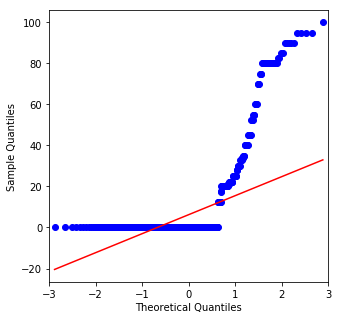

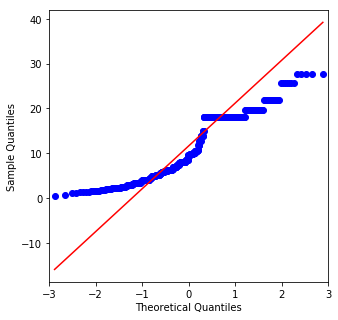

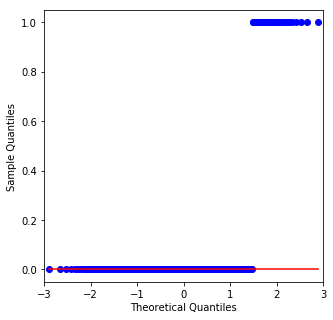

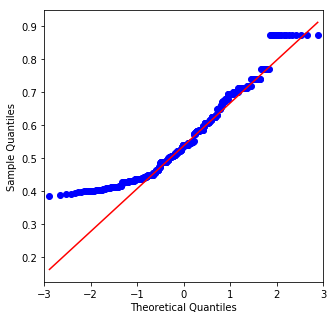

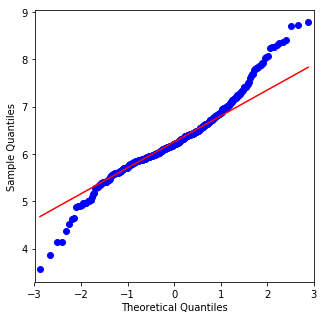

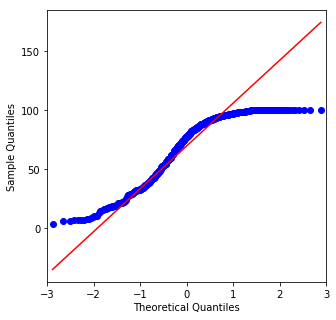

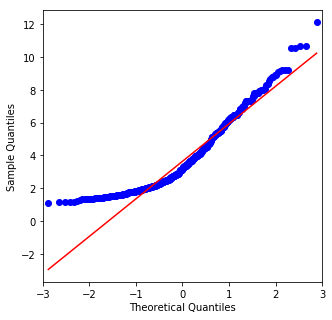

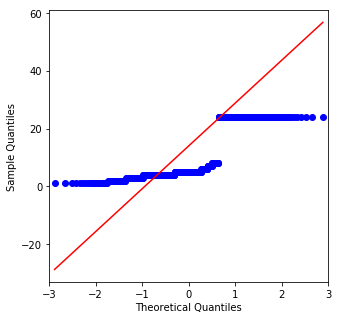

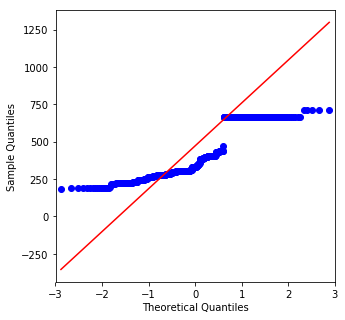

In [15]:
import statsmodels.api as sm

for i in range(10):
    plt.rc("figure", figsize=(5,5))
    sm.qqplot(boston.data[:,i], stats.norm, line='q')
    plt.show()

In [9]:
# additional packages
from statsmodels.stats.diagnostic import lillifors

In [10]:
# Set the parameters
numData = 1000
myMean = 0
mySD = 3

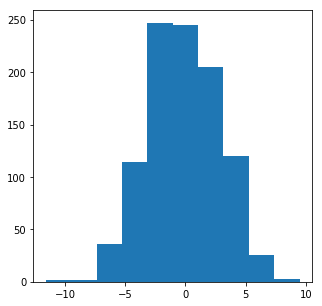

In [11]:
# Generate and show random data
data = stats.norm.rvs(myMean, mySD, size=numData)
fewData = data[:100]
plt.hist(data)
plt.show()

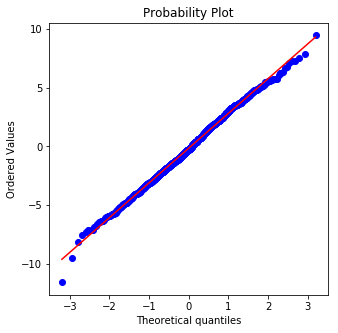

In [12]:
 # --- >>> START stats <<< ---
# Graphical test: if the data lie on a line, they are pretty much
# normally distributed
stats.probplot(data, plot=plt)
plt.show()

In [7]:
pVals = pd.Series()
pFewVals = pd.Series()
# The scipy normaltest is based on D-Agostino and Pearsons test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVals['Omnibus']    = stats.normaltest(data)
_, pFewVals['Omnibus'] = stats.normaltest(fewData)

# Shapiro-Wilk test
_, pVals['Shapiro-Wilk']    = stats.shapiro(data)
_, pFewVals['Shapiro-Wilk'] = stats.shapiro(fewData)

# Or you can check for normality with Lilliefors-test
_, pVals['Lilliefors']    = lillifors(data)
_, pFewVals['Lilliefors'] = lillifors(fewData)

# Alternatively with original Kolmogorov-Smirnov test
_, pVals['Kolmogorov-Smirnov']    = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')
_, pFewVals['Kolmogorov-Smirnov'] = stats.kstest((fewData-np.mean(fewData))/np.std(fewData,ddof=1), 'norm')

print('p-values for all {0} data points: ----------------'.format(len(data)))
print(pVals)
print('p-values for the first 100 data points: ----------------')
print(pFewVals)

if pVals['Omnibus'] > 0.05:
    print('Data are normally distributed')
# --- >>> STOP stats <<< ---

p-values for all 1000 data points: ----------------
Omnibus               0.856407
Shapiro-Wilk          0.788625
Lilliefors            0.195048
Kolmogorov-Smirnov    0.631536
dtype: float64
p-values for the first 100 data points: ----------------
Omnibus               0.494878
Shapiro-Wilk          0.647018
Lilliefors            0.048368
Kolmogorov-Smirnov    0.384683
dtype: float64
Data are normally distributed
